In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In above data there is no any missing values 

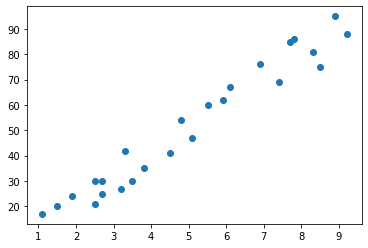

In [5]:
# Plotting the scatter for data
plt.scatter(df['Hours'],df['Scores'])


### Sprit data in train and test

In [6]:
from sklearn.model_selection import train_test_split 
x = df.drop('Scores',axis=1)
y = df['Scores']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Train model on Linear regression 

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

#### Plotting the regression line

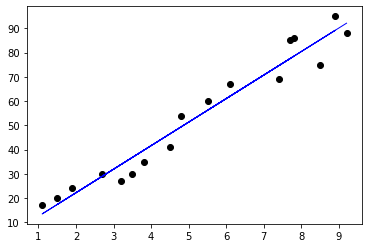

In [8]:

M = lr.coef_
C = lr.intercept_
best_line = M*x_train+ C
plt.scatter(x_train,y_train, color="black")
plt.plot(x_train, best_line, color="blue", linewidth=1)


#### Model prediction on test data 

In [9]:
y_pred = lr.predict(x_test)
# compering between Predicted and Actual values
df1 = pd.DataFrame()
df1['Actual'] = y_test
df1['Predicted'] = y_pred
df1

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


### Evaluating the model

Evaluating by Root Mean Square error

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

4.859985351228103

Evaluating by R square

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9487647340257012

#### We get 94% accuracy for above model and also 4.8599 RMSE value

### What will be predicted score if a student studies for 9.25 hrs/day ?

#### Prediction for above case

In [12]:
hours = (9.25)
pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.61670033840096
